<a href="https://colab.research.google.com/github/rohilahuja3/Ai_Final_labs/blob/main/Final_Decision_tree_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree Hard Coded for tesnnis Question 1 part 1

Q1) 

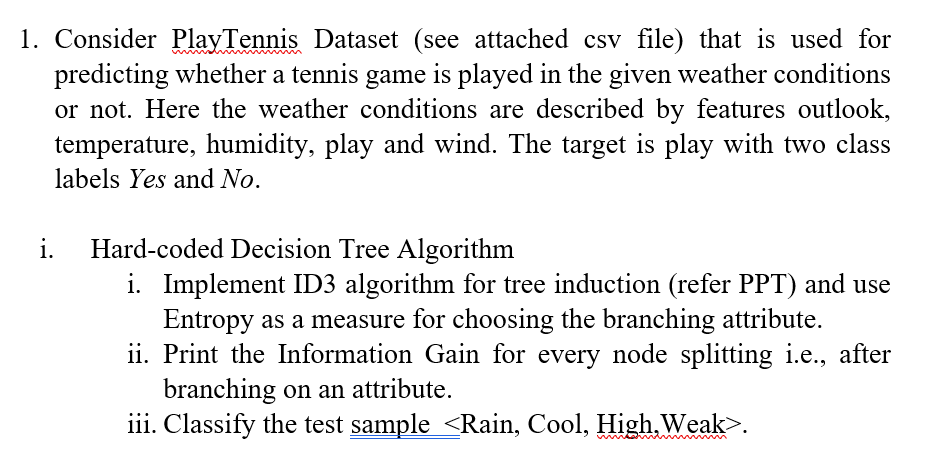

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pwd

'/content'

In [3]:
cd /content/gdrive/MyDrive/Ai_lab_new/Lab6_Decision_Tree

/content/gdrive/MyDrive/Ai_lab_new/Lab6_Decision_Tree


In [4]:
import numpy as np
import pandas as pd

In [5]:
data_hard_coded = pd.read_excel('tesnnis_new.xlsx')
data_hard_coded

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [6]:
def id3(train_data_m, label):
    train_data = train_data_m.copy()
    tree = {}
    class_list = train_data[label].unique()
    make_tree(tree, None, train_data_m, label, class_list)
    
    return tree

In [7]:
def make_tree(root, prev_feature_value, train_data, label, class_list):
    if train_data.shape[0] != 0:
        max_info_feature = find_most_informative_feature(train_data, label, class_list)
        print(max_info_feature)
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list)
        next_root = None
        
        if prev_feature_value != None:
            root[prev_feature_value] = dict()
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else:
            root[max_info_feature] = tree
            next_root = root[max_info_feature]
        
        for node, branch in list(next_root.items()):
            if branch == "?":
                feature_value_data = train_data[train_data[max_info_feature] == node]
                make_tree(next_root, node, feature_value_data, label, class_list)

In [8]:
def generate_sub_tree(feature_name, train_data, label, class_list):
    feature_value_count_dict = train_data[feature_name].value_counts(sort=False)
    tree = {}
    
    for feature_value, count in feature_value_count_dict.iteritems():
        feature_value_data = train_data[train_data[feature_name] == feature_value]
        
        assigned_to_node = False
        for c in class_list:
            class_count = feature_value_data[feature_value_data[label] == c].shape[0]

            if class_count == count:
                tree[feature_value] = c
                train_data = train_data[train_data[feature_name] != feature_value]
                assigned_to_node = True
        if not assigned_to_node:
            tree[feature_value] = "?"
            
    return tree, train_data

In [9]:
def find_most_informative_feature(train_data, label, class_list):
    feature_list = train_data.columns.drop(label)
    max_info_gain = -1
    max_info_feature = None
    
    for feature in feature_list:  
        feature_info_gain = calc_info_gain(feature, train_data, label, class_list)
        print(feature,feature_info_gain)
        if max_info_gain < feature_info_gain:
            max_info_gain = feature_info_gain
            max_info_feature = feature
            
    return max_info_feature

In [10]:
def calc_info_gain(feature_name, train_data, label, class_list):
    feature_value_list = train_data[feature_name].unique()
    total_row = train_data.shape[0]
    feature_info = 0.0
    
    for feature_value in feature_value_list:
        feature_value_data = train_data[train_data[feature_name] == feature_value]
        feature_value_count = feature_value_data.shape[0]
        feature_value_entropy = calc_entropy(feature_value_data, label, class_list)
        feature_value_probability = feature_value_count/total_row
        feature_info += feature_value_probability * feature_value_entropy
        
    return calc_total_entropy(train_data, label, class_list) - feature_info

In [11]:
def calc_entropy(feature_value_data, label, class_list):
    class_count = feature_value_data.shape[0]
    entropy = 0
    
    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0]
    
        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count
            entropy_class = - probability_class * np.log2(probability_class) 
        
        entropy += entropy_class
        
    return entropy

In [12]:
def calc_total_entropy(train_data, label, class_list):
    total_row = train_data.shape[0]
    total_entr = 0
    
    for c in class_list:
        total_class_count = train_data[train_data[label] == c].shape[0]
        total_class_entr = - (total_class_count/total_row)*np.log2(total_class_count/total_row) 
        total_entr += total_class_entr
    
    return total_entr

###The gain value for all the attributes will be printed

In [13]:
tree = id3(data_hard_coded, 'play')
tree

day 0.9402859586706309
outlook 0.2467498197744391
temp 0.029222565658954647
humidity 0.15183550136234136
wind 0.04812703040826927
day


{'day': {'D1': 'No',
  'D10': 'Yes',
  'D11': 'Yes',
  'D12': 'Yes',
  'D13': 'Yes',
  'D14': 'No',
  'D2': 'No',
  'D3': 'Yes',
  'D4': 'Yes',
  'D5': 'Yes',
  'D6': 'No',
  'D7': 'Yes',
  'D8': 'No',
  'D9': 'Yes'}}

In [14]:
outlook = data_hard_coded.groupby(['outlook','play']).size()
print(outlook,'\n') 

temp = data_hard_coded.groupby(['temp','play']).size()
print(temp,'\n') 

humality = data_hard_coded.groupby(['humidity','play']).size()
print(humality,'\n')

wind = data_hard_coded.groupby(['wind','play']).size() 
print(outlook,'\n') 

outlook   play
Overcast  Yes     4
Rain      No      2
          Yes     3
Sunny     No      3
          Yes     2
dtype: int64 

temp  play
Cool  No      1
      Yes     3
Hot   No      2
      Yes     2
Mild  No      2
      Yes     4
dtype: int64 

humidity  play
High      No      4
          Yes     3
Normal    No      1
          Yes     6
dtype: int64 

outlook   play
Overcast  Yes     4
Rain      No      2
          Yes     3
Sunny     No      3
          Yes     2
dtype: int64 



In [15]:
def predict(tree, instance):
    if not isinstance(tree, dict):
        return tree
    else:
        root_node = next(iter(tree))
        feature_value = instance[root_node]
        if feature_value in tree[root_node]:
            return predict(tree[root_node][feature_value], instance)
        else:
            return None

In [16]:
def evaluate(tree, test_data_m, label):
    correct_preditct = 0
    wrong_preditct = 0
    for index, row in test_data_m.iterrows():
        result = predict(tree, test_data_m.iloc[index])
        if result == test_data_m[label].iloc[index]:
            correct_preditct += 1
        else:
            wrong_preditct += 1
    accuracy = correct_preditct / (correct_preditct + wrong_preditct)
    return accuracy

In [17]:
accuracy = evaluate(tree, data_hard_coded, 'play')
print("accuracy:", accuracy)

accuracy: 1.0


In [18]:
test=pd.read_excel("question1.xlsx")
test

,D1,Rain,Cool,High,Weak


In [19]:
ans=[]
for index, row in test.iterrows():
  result = predict(tree, test.iloc[index])
  ans=result.append(result)
print(bool(ans))

False


#Decision Tree Hard Coded for New Data (Extra)

In [20]:
pwd

'/content/gdrive/MyDrive/Ai_lab_new/Lab6_Decision_Tree'

In [21]:
data_new = pd.read_excel('data2_for_Decision_tree.xlsx')
data_new

,Age,Completion,Type,Profit
0,old,yes,software,down
1,old,no,software,down
2,old,no,hardware,down
3,mid,yes,software,down
4,mid,yes,hardware,down
5,mid,no,hardware,up
6,mid,no,software,up
7,new,yes,software,up
8,new,no,hardware,up
9,new,no,software,up


In [22]:
Age = data_new.groupby(['Age','Profit']).size()
print(Age,'\n') 

Completion = data_new.groupby(['Completion','Profit']).size()
print(Completion,'\n') 

Type = data_new.groupby(['Type','Profit']).size()
print(Type,'\n')

Age  Profit
mid  down      2
     up        2
new  up        3
old  down      3
dtype: int64 

Completion  Profit
no          down      2
            up        4
yes         down      3
            up        1
dtype: int64 

Type      Profit
hardware  down      2
          up        2
software  down      3
          up        3
dtype: int64 



In [23]:
def id3(train_data_m, label):
    train_data = train_data_m.copy()
    tree = {}
    class_list = train_data[label].unique()
    make_tree(tree, None, train_data_m, label, class_list)
    
    return tree

In [24]:
def make_tree(root, prev_feature_value, train_data, label, class_list):
    if train_data.shape[0] != 0:
        max_info_feature = find_most_informative_feature(train_data, label, class_list)
        print(max_info_feature)
        tree, train_data = generate_sub_tree(max_info_feature, train_data, label, class_list)
        next_root = None
        
        if prev_feature_value != None:
            root[prev_feature_value] = dict()
            root[prev_feature_value][max_info_feature] = tree
            next_root = root[prev_feature_value][max_info_feature]
        else:
            root[max_info_feature] = tree
            next_root = root[max_info_feature]
        
        for node, branch in list(next_root.items()):
            if branch == "?":
                feature_value_data = train_data[train_data[max_info_feature] == node]
                make_tree(next_root, node, feature_value_data, label, class_list)

In [25]:
def generate_sub_tree(feature_name, train_data, label, class_list):
    feature_value_count_dict = train_data[feature_name].value_counts(sort=False)
    tree = {}
    
    for feature_value, count in feature_value_count_dict.iteritems():
        feature_value_data = train_data[train_data[feature_name] == feature_value]
        
        assigned_to_node = False
        for c in class_list:
            class_count = feature_value_data[feature_value_data[label] == c].shape[0]

            if class_count == count:
                tree[feature_value] = c
                train_data = train_data[train_data[feature_name] != feature_value]
                assigned_to_node = True
        if not assigned_to_node:
            tree[feature_value] = "?"
            
    return tree, train_data

In [26]:
def find_most_informative_feature(train_data, label, class_list):
    feature_list = train_data.columns.drop(label)
    max_info_gain = -1
    max_info_feature = None
    
    for feature in feature_list:  
        feature_info_gain = calc_info_gain(feature, train_data, label, class_list)
        print(feature,feature_info_gain)
        if max_info_gain < feature_info_gain:
            max_info_gain = feature_info_gain
            max_info_feature = feature
            
    return max_info_feature

In [27]:
def calc_info_gain(feature_name, train_data, label, class_list):
    feature_value_list = train_data[feature_name].unique()
    total_row = train_data.shape[0]
    feature_info = 0.0
    
    for feature_value in feature_value_list:
        feature_value_data = train_data[train_data[feature_name] == feature_value]
        feature_value_count = feature_value_data.shape[0]
        feature_value_entropy = calc_entropy(feature_value_data, label, class_list)
        feature_value_probability = feature_value_count/total_row
        feature_info += feature_value_probability * feature_value_entropy
        
    return calc_total_entropy(train_data, label, class_list) - feature_info

In [28]:
def calc_entropy(feature_value_data, label, class_list):
    class_count = feature_value_data.shape[0]
    entropy = 0
    
    for c in class_list:
        label_class_count = feature_value_data[feature_value_data[label] == c].shape[0]
    
        entropy_class = 0
        if label_class_count != 0:
            probability_class = label_class_count/class_count
            entropy_class = - probability_class * np.log2(probability_class) 
        
        entropy += entropy_class
        
    return entropy

In [29]:
def calc_total_entropy(train_data, label, class_list):
    total_row = train_data.shape[0]
    total_entr = 0
    
    for c in class_list:
        total_class_count = train_data[train_data[label] == c].shape[0]
        total_class_entr = - (total_class_count/total_row)*np.log2(total_class_count/total_row) 
        total_entr += total_class_entr
    
    return total_entr

In [30]:
tree = id3(data_new, 'Profit')
tree

Age 0.6
Completion 0.12451124978365313
Type 0.0
Age
Age 0.0
Completion 1.0
Type 0.0
Completion


{'Age': {'mid': {'Completion': {'no': 'up', 'yes': 'down'}},
  'new': 'up',
  'old': 'down'}}

In [31]:
def evaluate(tree, test_data_m, label):
    correct_preditct = 0
    wrong_preditct = 0
    for index, row in test_data_m.iterrows():
        result = predict(tree, test_data_m.iloc[index])
        if result == test_data_m[label].iloc[index]:
            correct_preditct += 1
        else:
            wrong_preditct += 1
    accuracy = correct_preditct / (correct_preditct + wrong_preditct)
    return accuracy

In [32]:
accuracy = evaluate(tree, data_new, 'Profit')
print("accuracy:", accuracy)

accuracy: 1.0


#Decision tree using scikit library (encoding) Question 1 part 2


Q2)

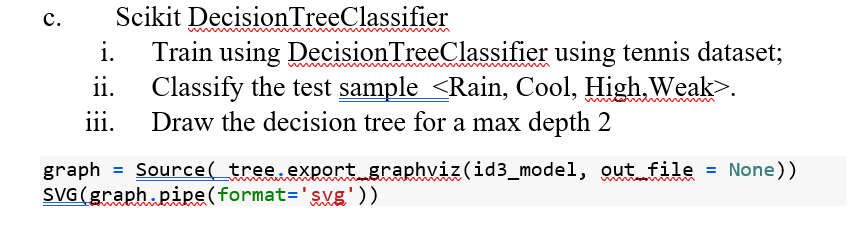

In [33]:
pwd

'/content/gdrive/MyDrive/Ai_lab_new/Lab6_Decision_Tree'

In [34]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [35]:
data_encode = pd.read_excel('tesnnis_new.xlsx')
data_encode

# column_names=  ['outlook','temp','humidity','wind','play']

# data_encode = pd.read_excel("tesnnis_new.xlsx",header=None, names=column_names)
# print(data_encode)

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [36]:
len1 = len(list(data_encode.columns.values))
for attr in list(data_encode.columns.values)[0:len1-1]:
    l1 = []
    for i in range(0,len(list(data_encode[attr]))):
        if(data_encode[attr][i] not in l1):
            l1.append(data_encode[attr][i])
            
    for i in range(0,len(list(data_encode[attr]))):
        data_encode[attr][i] = l1.index(data_encode[attr][i])

print(data_encode.head(14))

   day outlook temp humidity wind play
0    0       0    0        0    0   No
1    1       0    0        0    1   No
2    2       1    0        0    0  Yes
3    3       2    1        0    0  Yes
4    4       2    2        1    0  Yes
5    5       2    2        1    1   No
6    6       1    2        1    1  Yes
7    7       0    1        0    0   No
8    8       0    2        1    0  Yes
9    9       2    1        1    0  Yes
10  10       0    1        1    1  Yes
11  11       1    1        0    1  Yes
12  12       1    0        1    0  Yes
13  13       2    1        0    1   No


In [37]:
data_encode.head()

,day,outlook,temp,humidity,wind,play
0,0,0,0,0,0,No
1,1,0,0,0,1,No
2,2,1,0,0,0,Yes
3,3,2,1,0,0,Yes
4,4,2,2,1,0,Yes


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

col_names=['outlook','temp','humidity','wind','play']

feature_cols = ['outlook','temp','humidity','wind']
X = data_encode[feature_cols] # Features
y = data_encode.play # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_dec = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
model_dec = model_dec.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model_dec.predict(X_test)

print(X_test,'\n')

print(y_pred)

   outlook temp humidity wind
9        2    1        1    0
11       1    1        0    1
0        0    0        0    0 

['Yes' 'No' 'No']


In [39]:
x_classify=pd.DataFrame(np.array([[3,3,1,1]]), columns=["outlook","temp","humidity","wind"])

y_predict_new=model_dec.predict(x_classify)

print(x_classify,'\n')
print(y_pred)

   outlook  temp  humidity  wind
0        3     3         1     1 

['Yes' 'No' 'No']


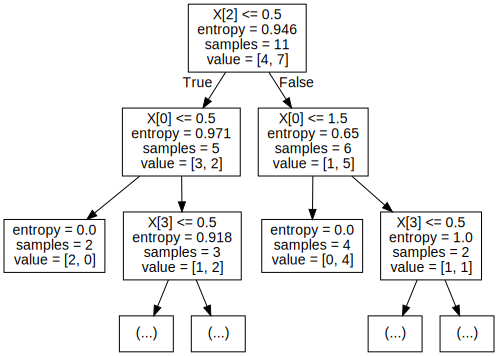

In [40]:
import graphviz
dot_data = tree.export_graphviz(model_dec,out_file=None,max_depth=2)
graph=graphviz.Source(dot_data)
graph

#Decision tree using scikit library (encoding) Question 2

Q2)

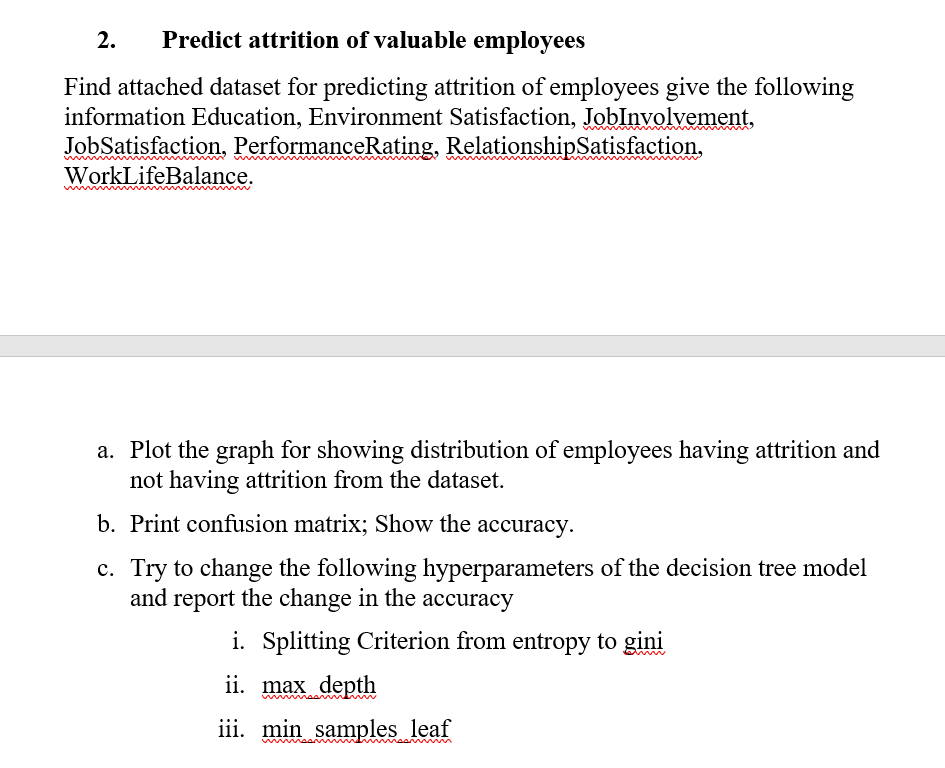

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns

In [42]:
pwd

'/content/gdrive/MyDrive/Ai_lab_new/Lab6_Decision_Tree'

In [56]:
data_2 = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data_2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


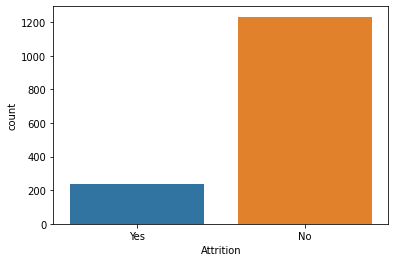

In [57]:
sns.countplot(data_2['Attrition'])

b)

In [58]:
#Remove the column EmployeeNumber
data_2 = data_2.drop('EmployeeNumber', axis = 1) # A number assignment 
#Remove the column StandardHours
data_2 = data_2.drop('StandardHours', axis = 1) #Contains only value 80 
#Remove the column EmployeeCount
data_2 = data_2.drop('EmployeeCount', axis = 1) #Contains only the value 1 
#Remove the column EmployeeCount
data_2 = data_2.drop('Over18', axis = 1) #Contains only the value 'Yes'

In [59]:
data_2.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


In [60]:
from sklearn.preprocessing import LabelEncoder

for column in data_2.columns:
        if data_2[column].dtype == np.number:
            continue
        data_2[column] = LabelEncoder().fit_transform(data_2[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [61]:
#Split the data into independent 'X' and dependent 'Y' variables
X = data_2.iloc[:, 1:data_2.shape[1]].values 
Y = data_2.iloc[:, 0].values 

In [62]:
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.02, random_state = 420)

In [63]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="entropy",random_state=0,min_samples_leaf=2)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, random_state=0)

In [67]:
model.score(X_train, Y_train)

0.7222222222222222

c) 

In [72]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, model.predict(X_test))

In [73]:
print(cm)

[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 